###  Исследование влияния обучения без учителя на эффективность обучения Marketing Mix dataset https://www.kaggle.com/datasets/veer06b/marrket-mix-dataset/

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('mktmix.csv')

In [3]:
df

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050000,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045000,103.438118,1.81860,NaN
...,...,...,...,...,...,...,...,...,...
99,18335,15.958634,292.0,29.485,NaN,0.000000,71.611508,3.08540,NaN
100,19054,15.642632,NaN,48.611,NaN,0.054209,135.093453,2.65688,NaN
101,18198,15.958634,NaN,29.323,NaN,0.040000,176.958036,2.92802,NaN
102,20495,15.642632,NaN,50.935,NaN,0.061000,164.527411,2.53958,NaN


In [4]:
df.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign '],
      dtype='object')

In [5]:
df.columns=df.columns.str.replace(' ','') 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NewVolSales       104 non-null    int64  
 1   Base_Price        104 non-null    float64
 2   Radio             100 non-null    float64
 3   InStore           104 non-null    float64
 4   NewspaperInserts  6 non-null      object 
 5   Discount          104 non-null    float64
 6   TV                104 non-null    float64
 7   Stout             104 non-null    float64
 8   Website_Campaign  14 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ KB


In [7]:
df.describe()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
count,104.000000,104.000000,100.000000,104.000000,104.000000,104.000000,104.000000
mean,20171.067308,15.306740,256.690000,32.918567,0.022059,141.009774,2.545966
std,1578.604670,0.528902,86.994682,13.682570,0.027668,42.949231,0.310070
min,17431.000000,13.735724,0.000000,10.782000,0.000000,37.656174,1.818600
25%,19048.750000,15.029276,235.000000,22.183750,0.000000,117.108343,2.316450
50%,19943.500000,15.332887,278.500000,31.161500,0.000000,138.581542,2.502120
75%,20942.750000,15.642632,313.250000,41.079000,0.049423,175.681780,2.814315
max,24944.000000,16.281020,399.000000,68.119000,0.090763,240.291967,3.158620


In [8]:
df.duplicated().sum() #проверяем на наличие дубликатов

0

#### Переведем NewVolSales из типа int64 в тип float64

In [9]:
df['NewVolSales'] = df['NewVolSales'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NewVolSales       104 non-null    float64
 1   Base_Price        104 non-null    float64
 2   Radio             100 non-null    float64
 3   InStore           104 non-null    float64
 4   NewspaperInserts  6 non-null      object 
 5   Discount          104 non-null    float64
 6   TV                104 non-null    float64
 7   Stout             104 non-null    float64
 8   Website_Campaign  14 non-null     object 
dtypes: float64(7), object(2)
memory usage: 7.4+ KB


#### Удалим столбцы NewspaperInserts и Website_Campaign так как они состоят преимущественно из пустых значений

Можно было к каждому занчению которое есть добавить метку класса, pd.get_dummies(data, columns=['Website_Campaign']), но с огромной вероятнотью модель переобучится, так как данных очень мало

In [10]:
df.isnull().sum()

NewVolSales          0
Base_Price           0
Radio                4
InStore              0
NewspaperInserts    98
Discount             0
TV                   0
Stout                0
Website_Campaign    90
dtype: int64

In [11]:
df.drop(columns = 'NewspaperInserts', axis=1, inplace = True)
df.drop(columns = 'Website_Campaign', axis=1, inplace = True)

In [12]:
df.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
0,19564.0,15.029276,245.0,15.452,0.000,101.780000,2.28342
1,19387.0,15.029276,314.0,16.388,0.000,76.734000,2.22134
2,23889.0,14.585093,324.0,62.692,0.050,131.590200,2.00604
3,20055.0,15.332887,298.0,16.573,0.000,119.627060,2.19897
4,20064.0,15.642632,279.0,41.504,0.045,103.438118,1.81860


#### Построим гистограммы данных

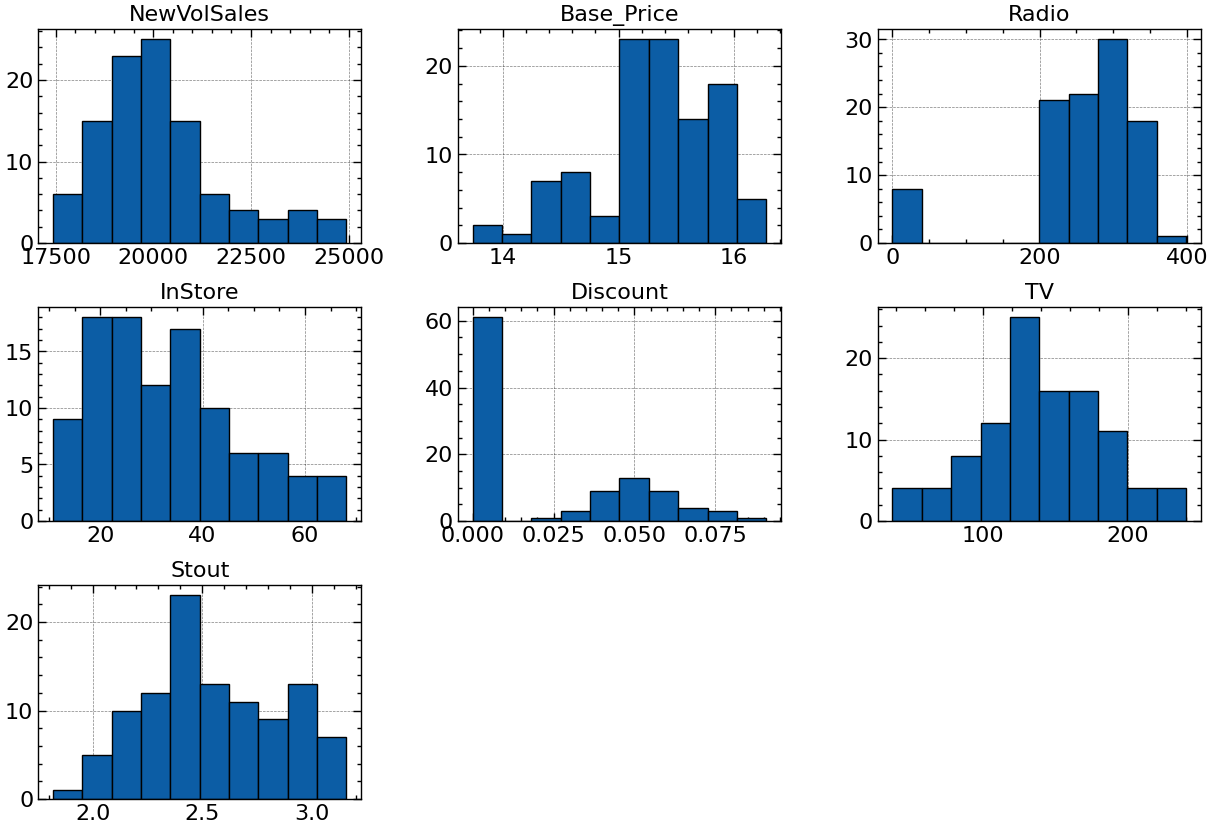

In [13]:
df.hist(figsize=(15, 10), bins=10, edgecolor="black")
plt.show()

#### Обозначим нулевые данные Radio и Discount как выбросы, заменим их пустыми значениями

Более половины данных из Discount имеют нулевое значение, тем самым при заполнении их в дальнейшем при обучении модели они не будут иметь почти никакой значимости, если бы данных было бы больше, вместо среднего значения я бы заполнял данные из апроксимацией построенной на линейной(или любой другой) регрессии на не нулевых данных (хотя модель постоенная на таких будет иметь недостаток в виде дополнительных линейных зависимостей, что способствует переобучению, можно использовать после данных манипуляций PCA). Еще как вариант можно было бы полностью удалить столбец

In [14]:
df.loc[df['Radio'] == 0, 'Radio'] = None
df.loc[df['Discount'] == 0, 'Discount'] = None
df

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
0,19564.0,15.029276,245.0,15.452,NaN,101.780000,2.28342
1,19387.0,15.029276,314.0,16.388,NaN,76.734000,2.22134
2,23889.0,14.585093,324.0,62.692,0.050000,131.590200,2.00604
3,20055.0,15.332887,298.0,16.573,NaN,119.627060,2.19897
4,20064.0,15.642632,279.0,41.504,0.045000,103.438118,1.81860
...,...,...,...,...,...,...,...
99,18335.0,15.958634,292.0,29.485,NaN,71.611508,3.08540
100,19054.0,15.642632,NaN,48.611,0.054209,135.093453,2.65688
101,18198.0,15.958634,NaN,29.323,0.040000,176.958036,2.92802
102,20495.0,15.642632,NaN,50.935,0.061000,164.527411,2.53958


#### Найдем выбросы в каждом стобце и заменим их на медиану, так как она более устойчива к выбросам

Убирал сначала нулевые значение в Radio и Discount так как это отразилось бы на медиане (например медиана в Discount была бы равна нулю)

In [15]:
# Определение функции для вычисления выбросов с использованием IQR
def outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

for column in df.columns:
    out = outliers(column)
    print(f"Количество выбросов в столбце {column}: {out.sum()}")

Количество выбросов в столбце NewVolSales: 5
Количество выбросов в столбце Base_Price: 3
Количество выбросов в столбце Radio: 0
Количество выбросов в столбце InStore: 0
Количество выбросов в столбце Discount: 1
Количество выбросов в столбце TV: 0
Количество выбросов в столбце Stout: 0


In [16]:
for column in df.columns:
    out = outliers(column)
    df.loc[out, column] = df[column].median()

In [17]:
for column in df.columns:
    out = outliers(column)
    print(f"Количество выбросов в столбце {column}: {out.sum()}")

Количество выбросов в столбце NewVolSales: 2
Количество выбросов в столбце Base_Price: 0
Количество выбросов в столбце Radio: 0
Количество выбросов в столбце InStore: 0
Количество выбросов в столбце Discount: 0
Количество выбросов в столбце TV: 0
Количество выбросов в столбце Stout: 0


#### Пропущенные значения Radio и Discount заменим среднем значением

(Берем среднее, а не медиану, так как выбросов больше нет)

In [18]:
df['Radio'].fillna(df['Radio'].mean(), inplace = True)
df['Discount'].fillna(df['Discount'].mean(), inplace = True)

#### Добавим столбец с логорифмом от числа продаж, так как распределение NewVolSales похоже на логнормальное

In [19]:
df['logSales'] = np.log(df.NewVolSales)
df

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,logSales
0,19564.0,15.029276,245.00000,15.452,0.052444,101.780000,2.28342,9.881446
1,19387.0,15.029276,314.00000,16.388,0.052444,76.734000,2.22134,9.872358
2,19943.5,14.585093,324.00000,62.692,0.050000,131.590200,2.00604,9.900659
3,20055.0,15.332887,298.00000,16.573,0.052444,119.627060,2.19897,9.906234
4,20064.0,15.642632,279.00000,41.504,0.045000,103.438118,1.81860,9.906682
...,...,...,...,...,...,...,...,...
99,18335.0,15.958634,292.00000,29.485,0.052444,71.611508,3.08540,9.816567
100,19054.0,15.642632,279.01087,48.611,0.054209,135.093453,2.65688,9.855032
101,18198.0,15.958634,279.01087,29.323,0.040000,176.958036,2.92802,9.809067
102,20495.0,15.642632,279.01087,50.935,0.061000,164.527411,2.53958,9.927936


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NewVolSales  104 non-null    float64
 1   Base_Price   104 non-null    float64
 2   Radio        104 non-null    float64
 3   InStore      104 non-null    float64
 4   Discount     104 non-null    float64
 5   TV           104 non-null    float64
 6   Stout        104 non-null    float64
 7   logSales     104 non-null    float64
dtypes: float64(8)
memory usage: 6.6 KB


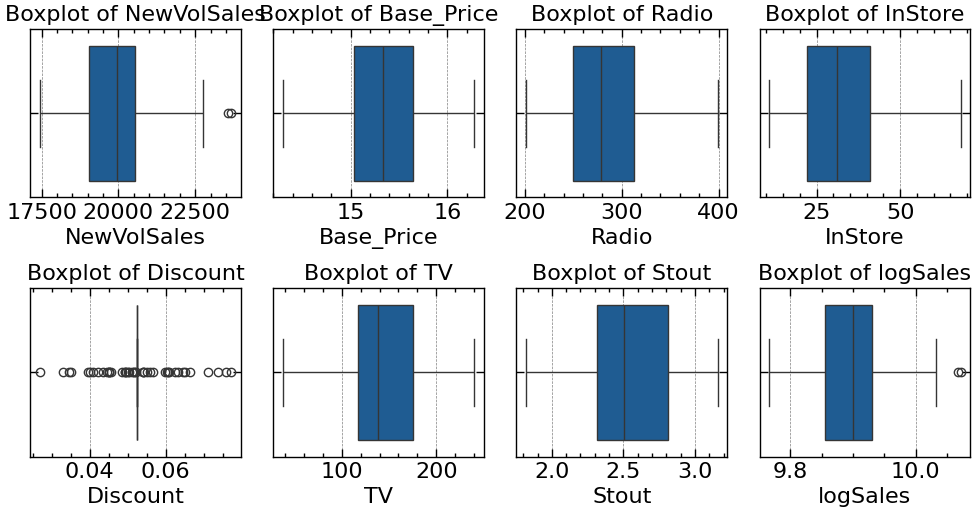

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()

plt.show()

#### Постоим совместную гистограмму распределений

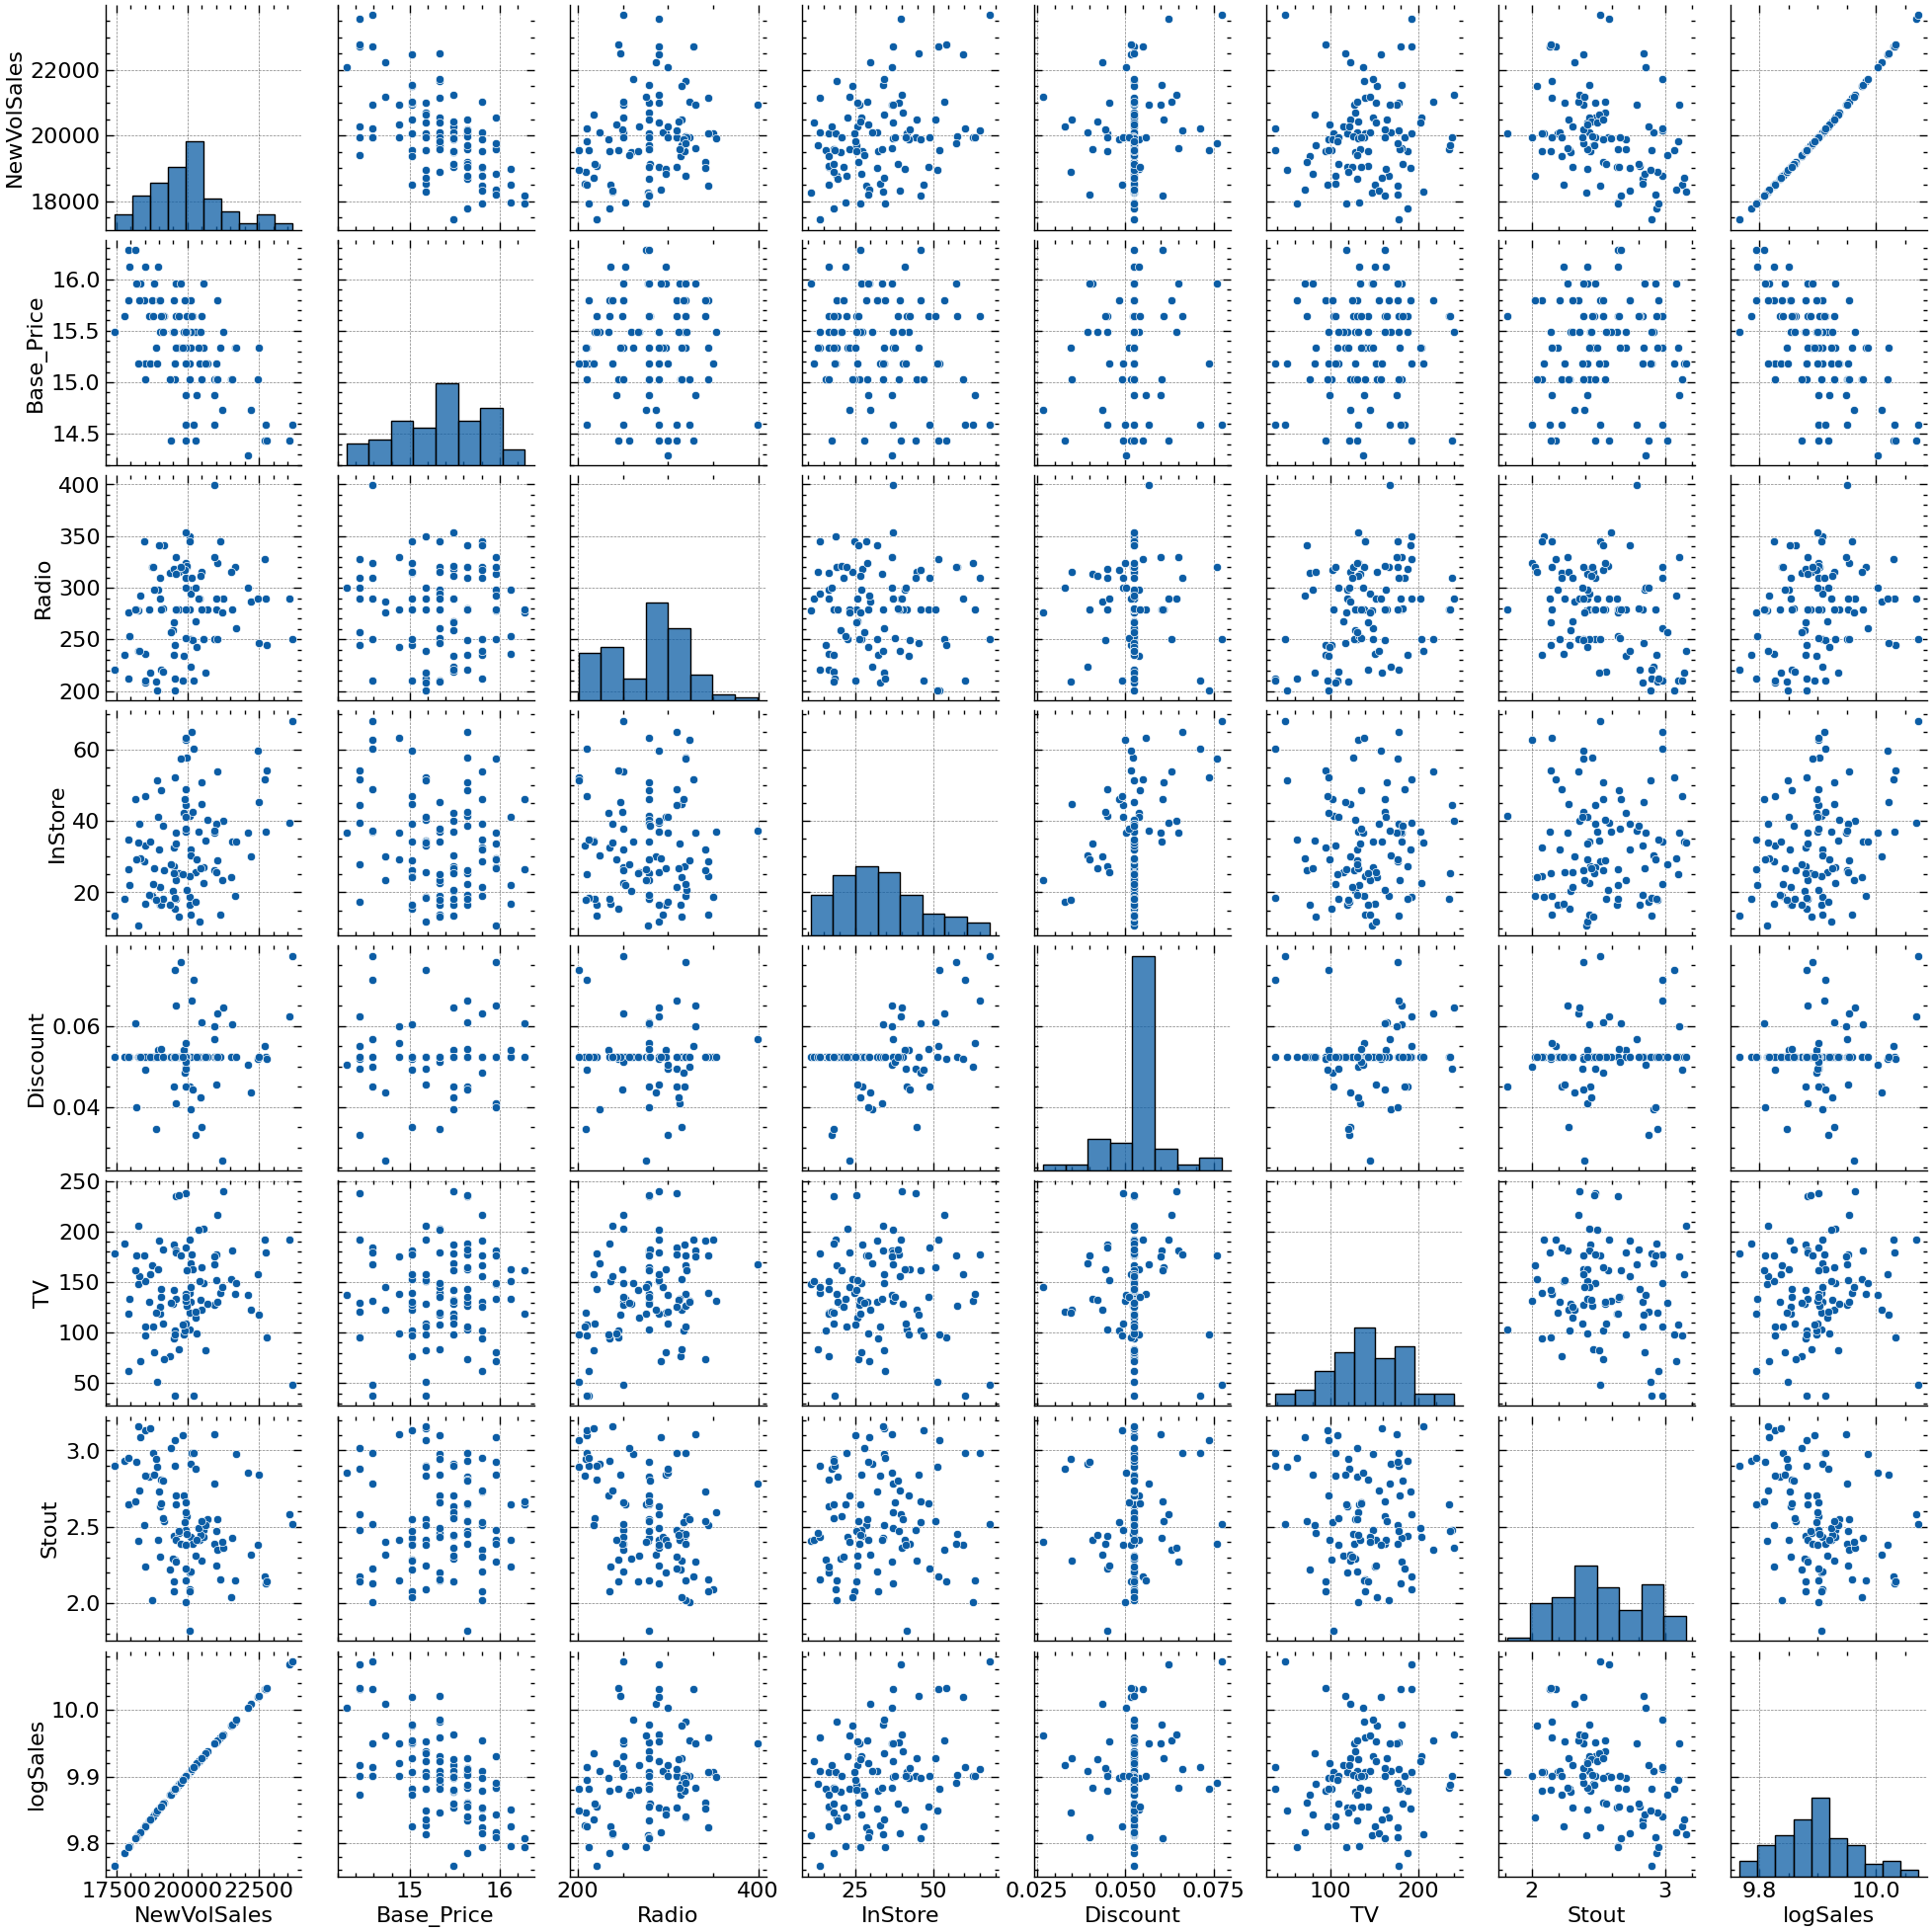

In [22]:
sns.pairplot(df)

plt.show()

#### Построим матрицу корреляций

<Figure size 500x500 with 0 Axes>

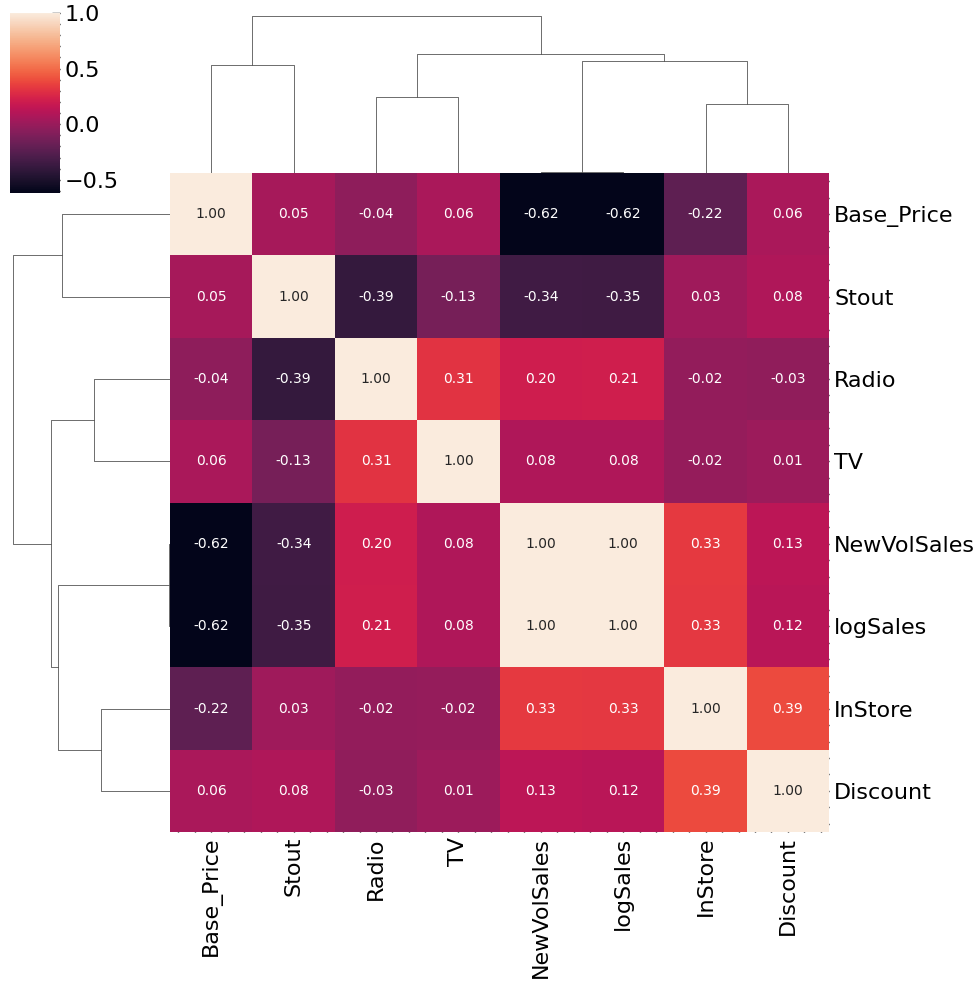

In [23]:
plt.figure(figsize=(5,5))
sns.clustermap(df.corr(), annot = True, fmt = ".2f")
plt.show()

#### Построим модель линейной регрессии

In [24]:
X = df.drop(['NewVolSales'], axis=1)
X = X.drop(['logSales'], axis=1).values
y = df['logSales'].values

logSales лучше обучается

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
for a in [X_train, X_test, y_train, y_test]:
    print(a.shape)

(83, 6)
(21, 6)
(83,)
(21,)


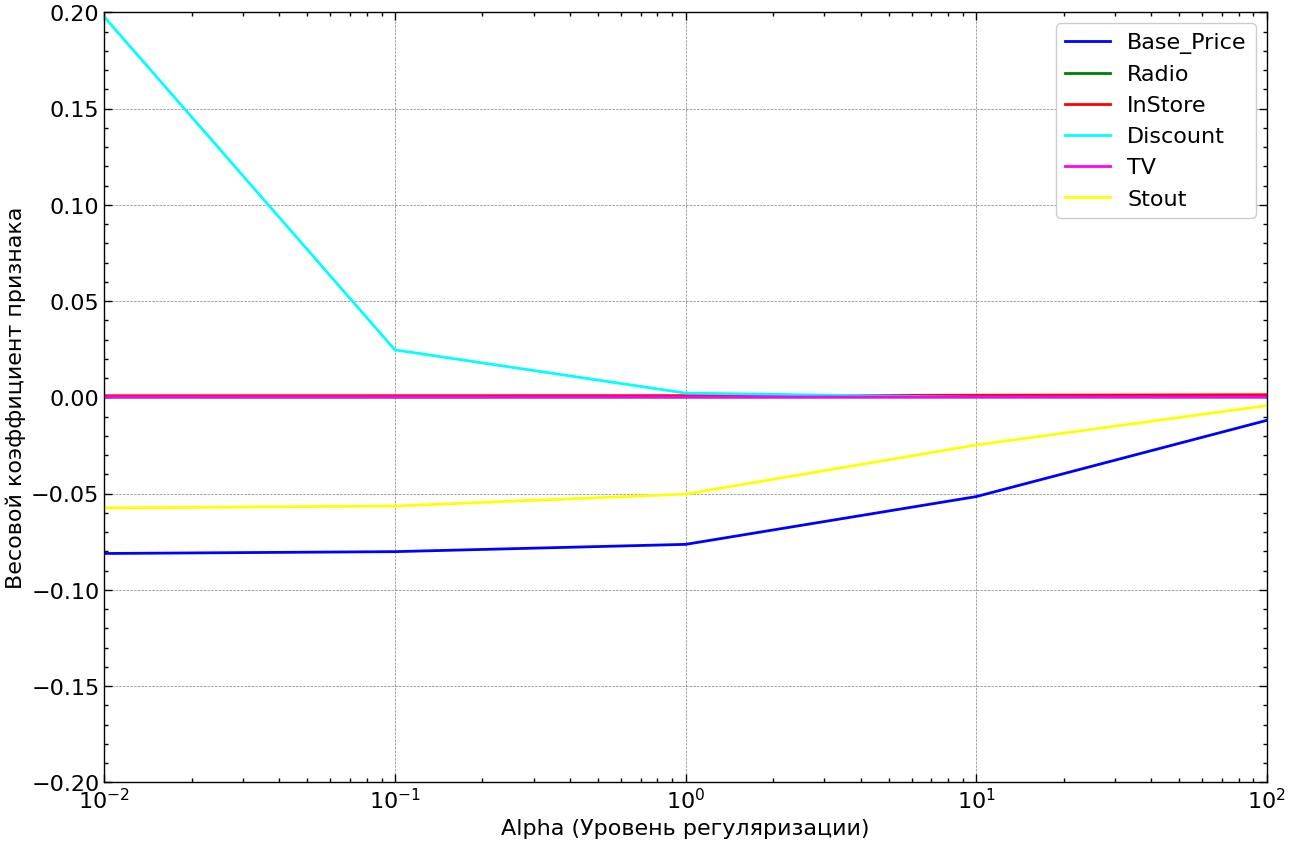

In [26]:
# Установка размера графика
fig, ax = plt.subplots(figsize=(15, 10))

# Определение цветов для различных признаков
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange', 'peru',
          'aqua', 'plum']

# Инициализация списков для хранения весов и параметров регуляризации
weights, alphas = [], []

# Перебор различных значений параметра регуляризации
for c in np.arange(-6., 5.):
    ridge = Ridge(alpha=10.**(-c), random_state=0)
    ridge.fit(X_train, y_train)
    weights.append(ridge.coef_)
    alphas.append(10.**(-c))

weights = np.array(weights)

# Построение графика изменения весов признаков в зависимости от уровня регуляризации
for column, color in zip(range(weights.shape[1]), colors):
    ax.plot(alphas, weights[:, column], label=df.columns[column + 1], color=color)

# Установка пределов для оси X и масштабирование
ax.set_ylim([-0.2, 0.2])
ax.set_xlim([10**(-2), 10**2])
ax.set_xscale('log')

# Подписи осей
ax.set_xlabel('Alpha (Уровень регуляризации)')
ax.set_ylabel('Весовой коэффициент признака')

# Легенда
ax.legend(loc='best')

# Отображение графика
plt.show()

 1) Base_Price                     0.404282
 2) Stout                          0.210371
 3) InStore                        0.134599
 4) Radio                          0.122057
 5) TV                             0.088302
 6) Discount                       0.040389


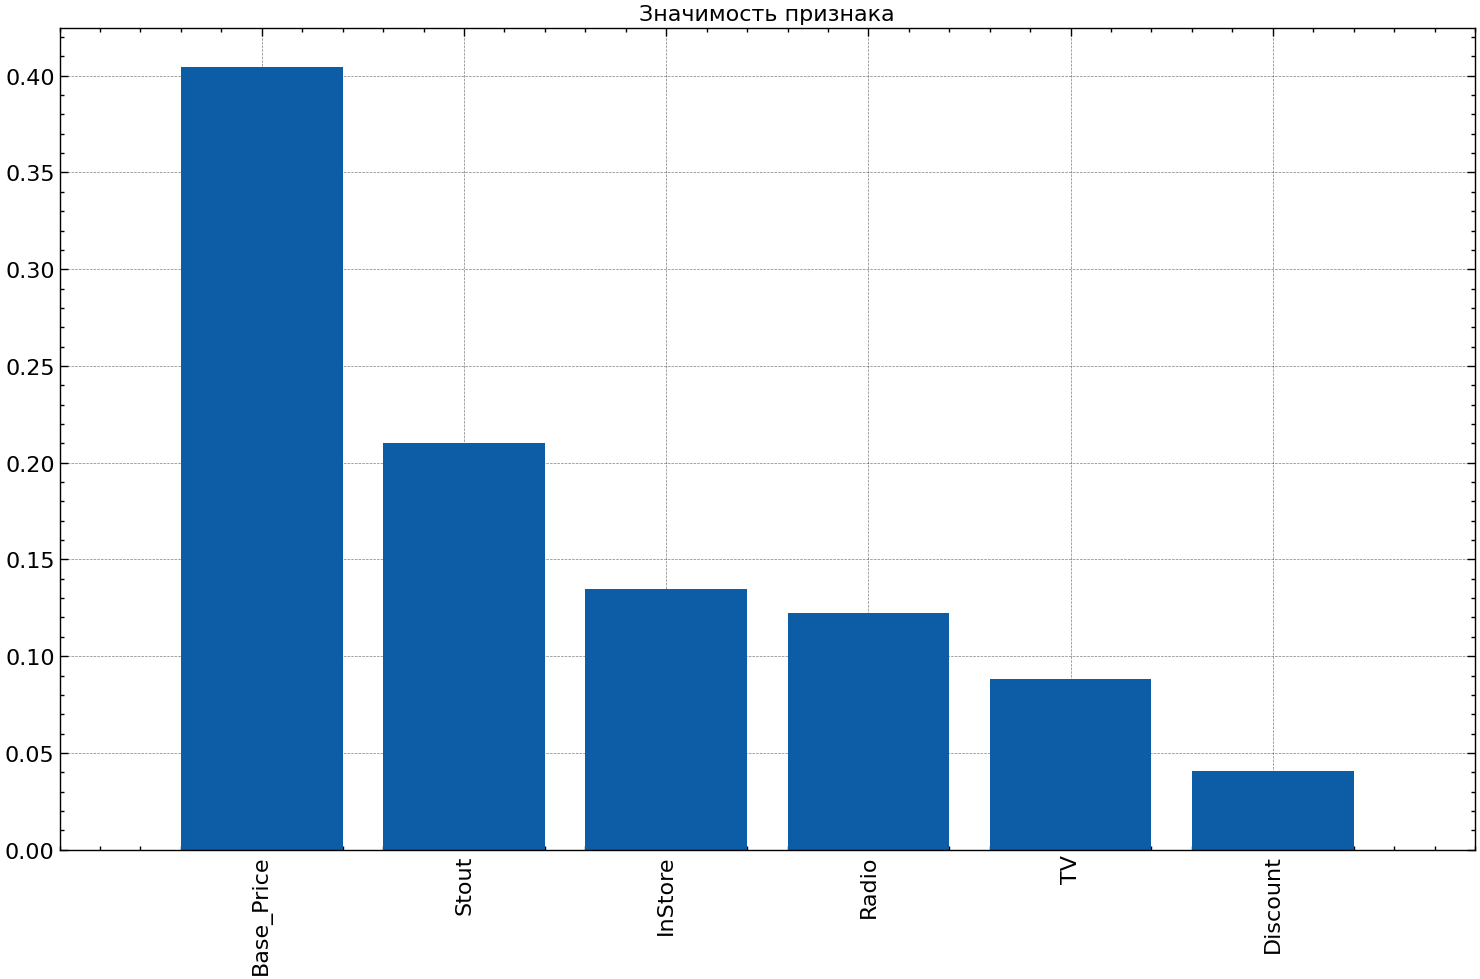

In [27]:
feat_labels = df.columns[1:]

rf = RandomForestRegressor(n_estimators=100, max_depth=8)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

fig = plt.figure(figsize=(15, 10))
plt.title('Значимость признака')
plt.bar(range(X_train.shape[1]), 
        importances[indices], 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

Основные признаки Base_price, Stout

### Использование Методов Обучения без учителя

#### Без методов

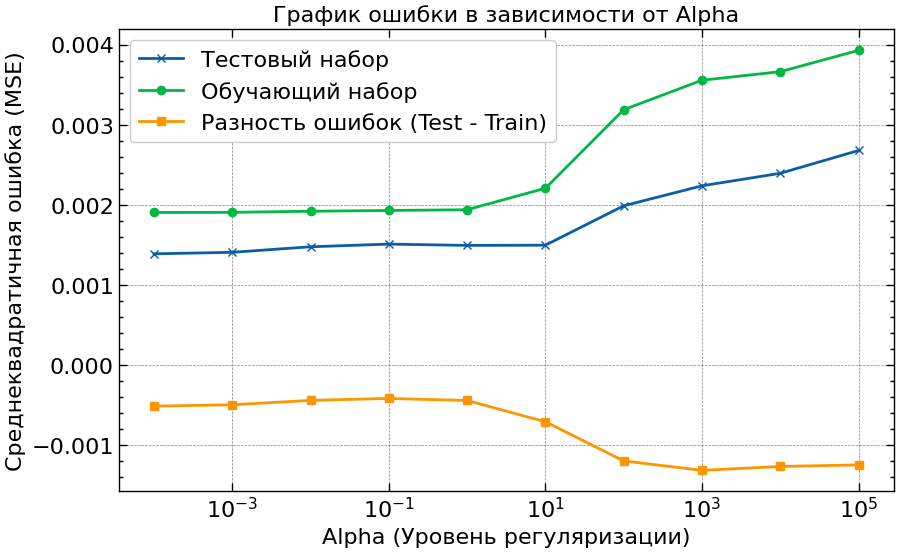

In [28]:
def plotMSE(X_train, X_test, y_train, y_test):
    # Инициализация списков для хранения ошибок и параметров регуляризации
    mse_errors_test, mse_errors_train, mse_diffs, alphas = [], [], [], []
    
    # Перебор различных значений параметра регуляризации
    for c in np.arange(-5., 5.):
        alpha = 10.**(-c)
        ridge = Ridge(alpha=alpha, random_state=23)
        ridge.fit(X_train, y_train)
        
        # Предсказание и вычисление MSE для тестового набора
        y_pred_test = ridge.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_errors_test.append(mse_test)
        
        # Предсказание и вычисление MSE для обучающего набора
        y_pred_train = ridge.predict(X_train)
        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_errors_train.append(mse_train)
        
        # Вычисление разности MSE
        mse_diff = mse_test - mse_train  
        mse_diffs.append(mse_diff)
        
        alphas.append(alpha)
    
    # Построение графиков ошибок
    plt.figure(figsize=(10, 6))
    plt.plot(alphas, mse_errors_test, marker='x', label='Тестовый набор')
    plt.plot(alphas, mse_errors_train, marker='o', label='Обучающий набор')
    plt.plot(alphas, mse_diffs, marker='s', label='Разность ошибок (Test - Train)')
    plt.xscale('log')
    plt.xlabel('Alpha (Уровень регуляризации)')
    plt.ylabel('Среднеквадратичная ошибка (MSE)')
    plt.title('График ошибки в зависимости от Alpha')
    plt.legend()
    plt.show()

plotMSE(X_train, X_test, y_train, y_test)

#### Использование StandardScaler

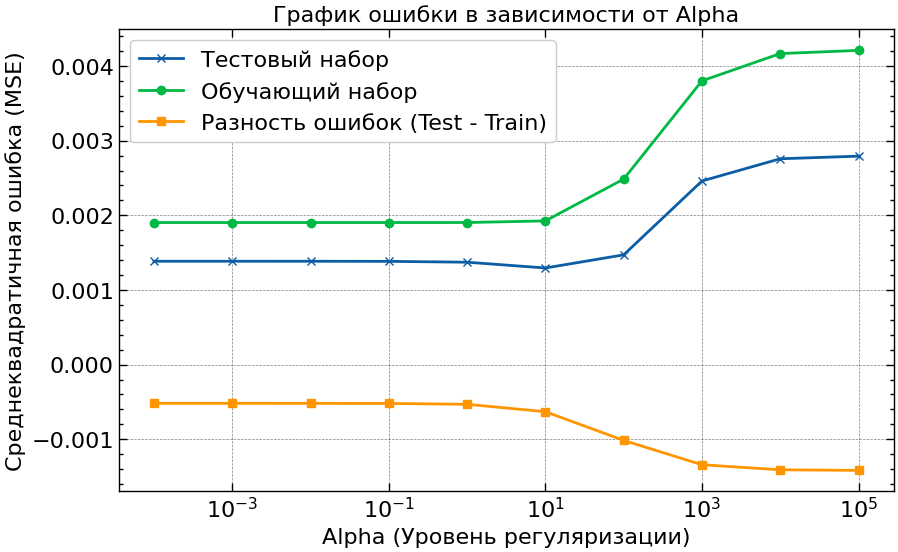

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plotMSE(X_train_scaled, X_test_scaled, y_train, y_test)

#### Снижение размерности с помощью метода главных компонент

(83, 6) (83, 4)


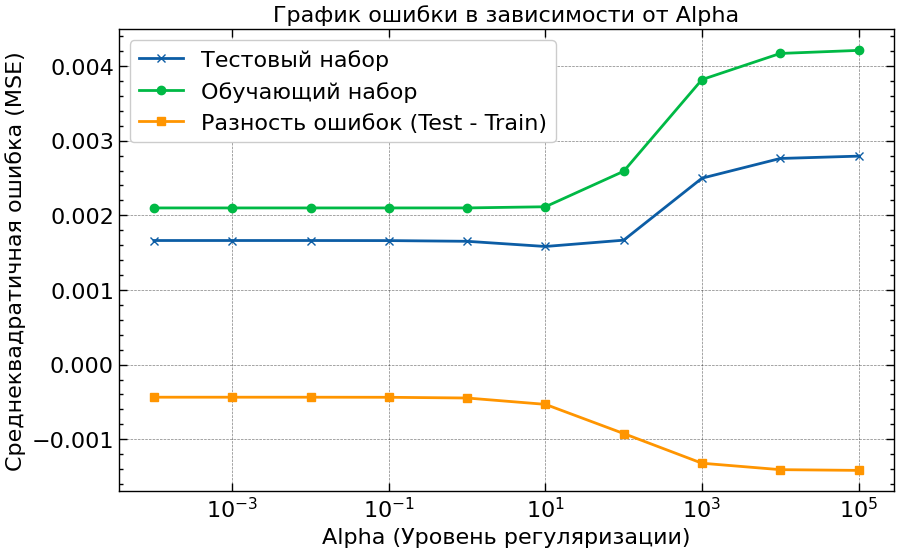

In [30]:
n = 4
pca = PCA(n_components=4)  # сохраняем n компонент вместо 6
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(X_train_scaled.shape, X_train_pca.shape)
plotMSE(X_train_pca, X_test_pca, y_train, y_test)

#### Добовление компонент KMeans

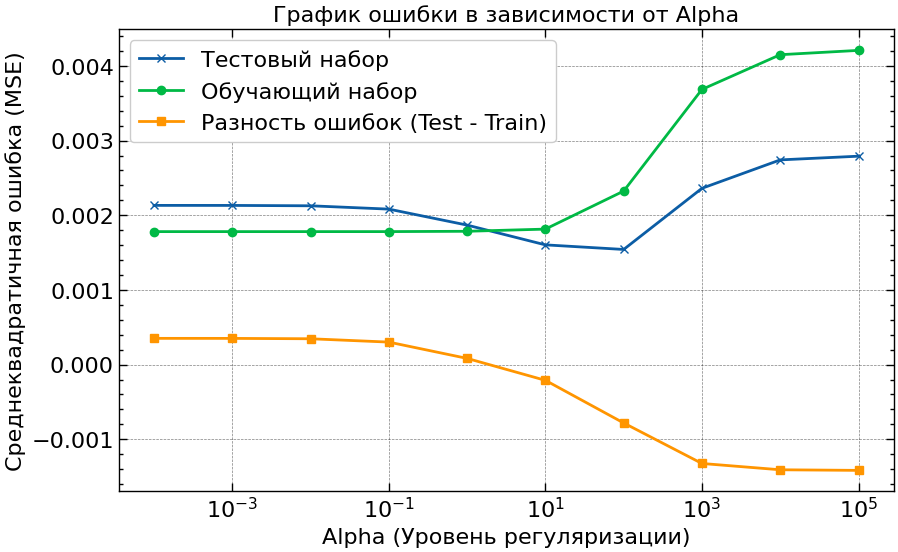

In [31]:
n = 4
kmeans = KMeans(n_clusters=n, n_init="auto", random_state=23)
X_train_kmeans = kmeans.fit_transform(X_train_scaled)
X_test_kmeans = kmeans.transform(X_test_scaled)
X_train_combined = np.hstack([X_train_scaled, X_train_kmeans])
X_test_combined = np.hstack([X_test_scaled, X_test_kmeans])

plotMSE(X_train_combined, X_test_combined, y_train, y_test)

In [32]:
X_s = scaler.transform(df.iloc[:,1:-1].values)
X_kM = kmeans.transform(X_s)
kM_df = pd.DataFrame(X_kM)
kM_df.columns = [f'KMeans{i+1}' for i in range(X_kM.shape[1])]
kM_df

,KMeans1,KMeans2,KMeans3,KMeans4
0,3.018312,2.773562,2.894305,2.006674
1,3.021902,3.744417,3.589862,2.183420
2,2.377022,4.789810,4.403474,4.081440
3,2.508933,3.554662,2.662538,1.223375
4,3.034838,4.305508,3.652320,2.658272
...,...,...,...,...
99,3.830510,2.706602,3.221425,2.651374
100,1.705104,2.449628,2.117191,2.003831
101,3.715374,3.763301,1.804520,2.861357
102,1.755836,3.190994,2.665061,2.578950


In [33]:
df_conc= pd.concat([df, kM_df],axis=1)
df_conc.drop(['NewVolSales'], axis=1, inplace=True)
df_conc.drop(['logSales'], axis=1, inplace=True)
df_conc

,Base_Price,Radio,InStore,Discount,TV,Stout,KMeans1,KMeans2,KMeans3,KMeans4
0,15.029276,245.00000,15.452,0.052444,101.780000,2.28342,3.018312,2.773562,2.894305,2.006674
1,15.029276,314.00000,16.388,0.052444,76.734000,2.22134,3.021902,3.744417,3.589862,2.183420
2,14.585093,324.00000,62.692,0.050000,131.590200,2.00604,2.377022,4.789810,4.403474,4.081440
3,15.332887,298.00000,16.573,0.052444,119.627060,2.19897,2.508933,3.554662,2.662538,1.223375
4,15.642632,279.00000,41.504,0.045000,103.438118,1.81860,3.034838,4.305508,3.652320,2.658272
...,...,...,...,...,...,...,...,...,...,...
99,15.958634,292.00000,29.485,0.052444,71.611508,3.08540,3.830510,2.706602,3.221425,2.651374
100,15.642632,279.01087,48.611,0.054209,135.093453,2.65688,1.705104,2.449628,2.117191,2.003831
101,15.958634,279.01087,29.323,0.040000,176.958036,2.92802,3.715374,3.763301,1.804520,2.861357
102,15.642632,279.01087,50.935,0.061000,164.527411,2.53958,1.755836,3.190994,2.665061,2.578950


 1) Base_Price                     0.297105
 2) KMeans1                        0.261388
 3) Stout                          0.097016
 4) KMeans4                        0.083994
 5) KMeans3                        0.054839
 6) InStore                        0.052675
 7) KMeans2                        0.049148
 8) TV                             0.040620
 9) Radio                          0.033085
10) Discount                       0.030131


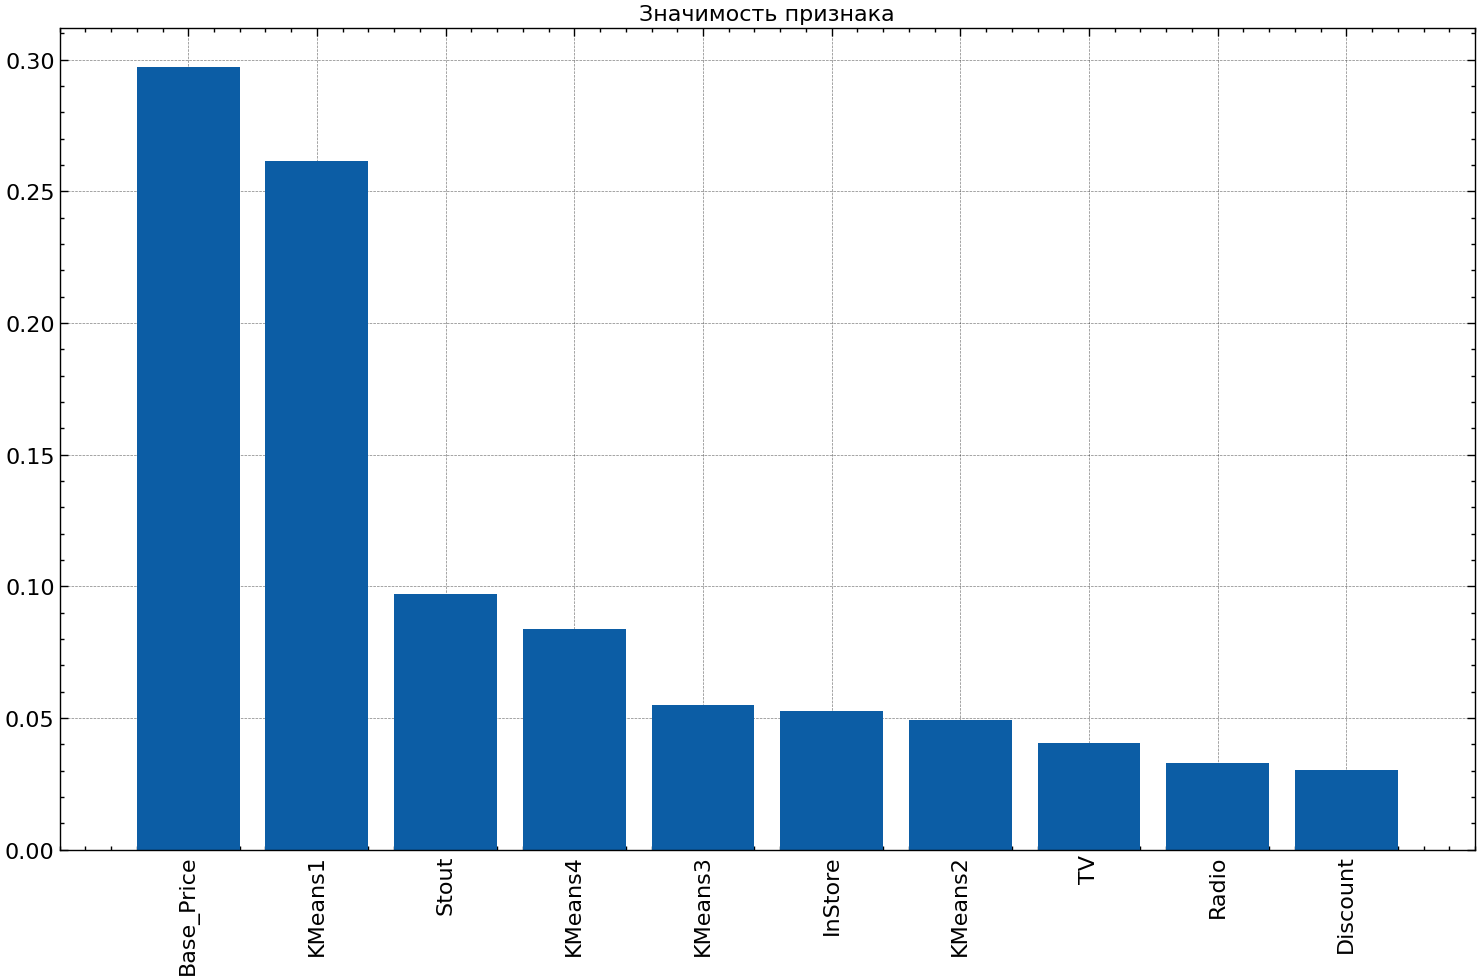

In [34]:
feat_labels = df_conc.columns

rf = RandomForestRegressor(n_estimators=100, max_depth=8)

rf.fit(X_train_combined, y_train)
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train_combined.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

fig = plt.figure(figsize=(15, 10))
plt.title('Значимость признака')
plt.bar(range(X_train_combined.shape[1]), 
        importances[indices], 
        align='center')

plt.xticks(range(X_train_combined.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_combined.shape[1]])
plt.tight_layout()
plt.show()

На основе выполненной работы можно сделать следующие выводы относительно исследования влияния методов обучения без учителя на эффективность обучения:

StandardScaler: Использование StandardScaler помогает уменьшить разницу между ошибками на тестовом и обучающем наборах данных. Это указывает на то, что масштабирование признаков способствует уменьшению переобучения модели, делая её более стабильной и обобщающей.

Метод главных компонент (PCA): Применение PCA позволяет уменьшить размерность данных, удаляя линейно-зависимые признаки. Это приводит к уменьшению размера модели, что может быть полезно для уменьшения вычислительных затрат и ускорения процесса обучения. При этом качество модели почти не ухудшается, что делает PCA эффективным инструментом для предобработки данных.

KMeans: Добавление новых признаков, полученных в результате кластеризации KMeans, существенно уменьшает ошибку модели. Это также приводит к уменьшению разницы между ошибками на тестовом и обучающем наборах, что может указывать на улучшение обобщающей способности модели. Однако следует учитывать, что добавление дополнительных признаков увеличивает размер модели, что может повлиять на требования к памяти и вычислительные ресурсы.

В целом, исследование показывает, что методы обучения без учителя могут быть полезны для улучшения качества моделей машинного обучения, уменьшения переобучения и оптимизации размера модели. Однако при выборе конкретного метода необходимо учитывать баланс между качеством модели и её размером.